In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Titanic dataset notebook

This notebook contains my take on the titanic dataset machine learning competition from kaggle!
Lets start by reading the train data and test data provided by the website.

In [377]:
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')
pd.set_option('max_columns', None)  # makes all columns visible on print

print(train_data)  # 12 columns total: with Survived being the dependent variable

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [378]:
train_data.isna().any()
# Age, Cabin and Embarked columns contains missing values

print(train_data["Age"].isna().value_counts())  # 177 missing values
print(train_data["Cabin"].isna().value_counts())  # 687 missing values
print(train_data["Embarked"].isna().value_counts())  # 2 missing values

False    714
True     177
Name: Age, dtype: int64
True     687
False    204
Name: Cabin, dtype: int64
False    889
True       2
Name: Embarked, dtype: int64


24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
C95            1
A34            1
E58            1
D21            1
B101           1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Total rows for col age: 712


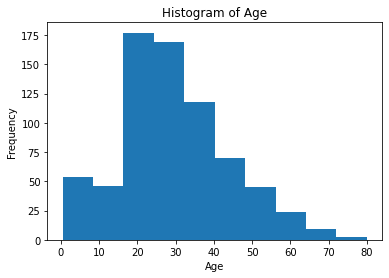

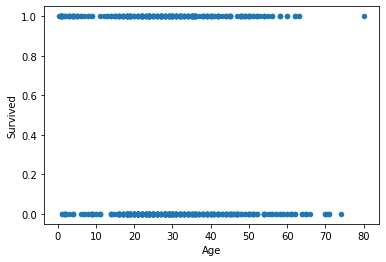

In [379]:
# Investigating these 3 variables a little bit further:

print(train_data["Age"].value_counts())
print(train_data["Cabin"].value_counts())
print(train_data["Embarked"].value_counts())

# Plot somewhat resembles a gamma distribution
plt.hist(train_data["Age"])
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

train_data.plot.scatter(x='Age', y='Survived')

# Age information has a lot of missing values aswell, but seems a variable worth
# testing how much it explains the "Survived" column. First test will be made
# removing all the NaNs from Age.

# Cabin information is weird. There are sometimes more than 1 cabin per person
# and has a lot of missing values. For now we'll proceed without it.

del train_data["Cabin"]
train_data

# Dropped all missing values from age and embarked
train_data.dropna(inplace=True)
print("Total rows for col age:",
      len(train_data["Age"]))  # total has been reduced by 179 (177 + 2)

# Embarked information seems it could be useful, will keep it

Now that we have removed all missing values, we'll analyze the remaining variables

0.6521739130434783people from the class 1 survived out of a total 184
0.4797687861271676people from the class 2 survived out of a total 173
0.23943661971830985people from the class 3 survived out of a total 355


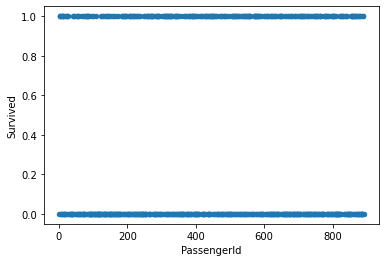

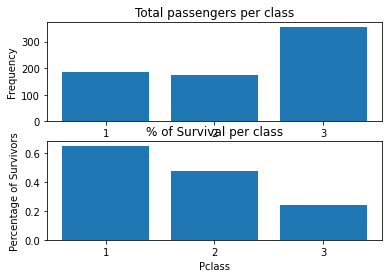

In [380]:
# Passenger ID will be maintained because the order that the passengers were
# added to the database may have something to do with their likelihood of survival.

# By looking at the scatterplot, it doesn't seem to be the case though.
train_data.plot.scatter(x="PassengerId", y="Survived")

# Survived column is of course our variable of interest and dependent variable
# and will be used in the models that we'll test.
# print(train_data['Survived'].value_counts())  # 342 survived and 549 didnt

# Pclass column has information about the social economic status of the passenger.
# Doing some quick analysis:
classes = []
percentages_of_survival_pclass = []

for i in range(1, 4):
    classes.append(train_data[train_data['Pclass'] == i].iloc[:, 1:3])
    percentages_of_survival_pclass.append(sum(classes[i-1]['Survived'])/len(classes[i-1]['Survived']))
    print(
        f"{percentages_of_survival_pclass[i-1]}people from the class {i} survived out of a total {len(classes[i-1]['Survived'])}"
    )
    

fig, axs = plt.subplots(2)
axs[0].bar(train_data['Pclass'].value_counts().sort_index().keys().astype(str),
        train_data['Pclass'].value_counts().sort_index())
axs[0].set_title('Total passengers per class')
axs[0].set(xlabel='Pclass', ylabel='Frequency')


axs[1].bar(train_data['Pclass'].value_counts().sort_index().keys().astype(str),
    percentages_of_survival_pclass)
axs[1].set_title('% of Survival per class')
axs[1].set(xlabel='Pclass', ylabel='Percentage of Survivors')

# 63%, 47.2% and 24.2% are the percentage of people who survived in the classes
# 1, 2 and 3 respectively. This tells us that the passengers with the highest
# level of socio-economic status appear to have a higher chance of survival

# Name column probably wont help us much here because if we take full names into consideration,
# almost 100% of them would be unique. We could reduce the feature # to first name, last name or
# something like that but even then we might still have way too many unique names.
#For now,  we'll move on without this feature.

del train_data["Name"]

0.2052980132450331 people from the sex male survived out of a total 453 male passengers 
0.752895752895753 people from the sex female survived out of a total 259 female passengers 


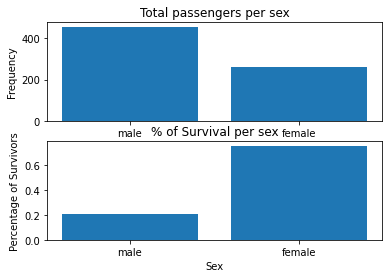

In [381]:
# Sex:
sexes = []
percentages_of_survival_sex = []

sex = ["male", 'female']
for i in range(0, 2):
    sexes.append(train_data[train_data['Sex'] == sex[i]].loc[:, ['Survived','Sex']])
    percentages_of_survival_sex.append(sum(sexes[i]['Survived'])/len(sexes[i]['Survived']))
    print(
        f"{percentages_of_survival_sex[i]} people from the sex {sex[i]} survived out of a total {len(sexes[i]['Survived'])} {sex[i]} passengers "
    )

fig, axs = plt.subplots(2)
axs[0].bar(train_data['Sex'].value_counts().keys(),
        train_data['Sex'].value_counts())
axs[0].set_title('Total passengers per sex')
axs[0].set(xlabel='Sex', ylabel='Frequency')


axs[1].bar(train_data['Sex'].value_counts().keys(),
    percentages_of_survival_sex)
axs[1].set_title('% of Survival per sex')
axs[1].set(xlabel='Sex', ylabel='Percentage of Survivors')

# It seems 74% of the female passengers survived versus 19% of the male passengers.
# this variable will probably be responsible for explaining a lot of the survivors

# Ticket column seems a bit weird to me. Some rows have a string mixed up with
# the ticket number. Could try removing those string parts and use only the numeric
# part but for now i will exclude this variable and see how the model fares
del train_data['Ticket']

<BarContainer object of 3 artists>

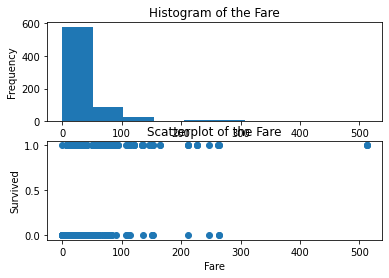

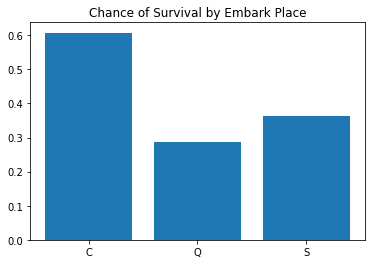

In [375]:
# Fare
fig, axs = plt.subplots(2)
axs[0].set_title('Histogram of the Fare')
axs[0].hist(train_data['Fare'])
axs[0].set(xlabel='Fare', ylabel='Frequency')

axs[1].set_title('Scatterplot of the Fare')
axs[1].scatter(train_data['Fare'], train_data['Survived'])
axs[1].set(xlabel='Fare', ylabel='Survived')
# from the scatterplot, doesnt seem like it tells much.

# Embarked

percentages_of_survival_embark = []
indexes = train_data[['Embarked', 'Survived']].value_counts().keys()
embark_classes = sorted(set(train_data['Embarked']))  # classes of embarked
for embark_place in embark_classes:
    filt = (indexes == (embark_place, 1))  # 1 = survived
    filt2 = (train_data['Embarked'].value_counts().keys()
             == embark_place)  # total of embark place
    percentages_of_survival_embark.append(train_data[['Embarked', 'Survived']].value_counts()[
                                          filt][0]/train_data['Embarked'].value_counts()[filt2][0])


fig2, ax = plt.subplots()
ax.set_title('Chance of Survival by Embark Place')
ax.bar(embark_classes, percentages_of_survival_embark)

# It seems that people who embarked on C (Cherbourg) have a better chance of survival compared to the
# other two embark places

We can also take a look at the below scatter plots to understand a little bit better the interaction between the survived variable and the other ones.

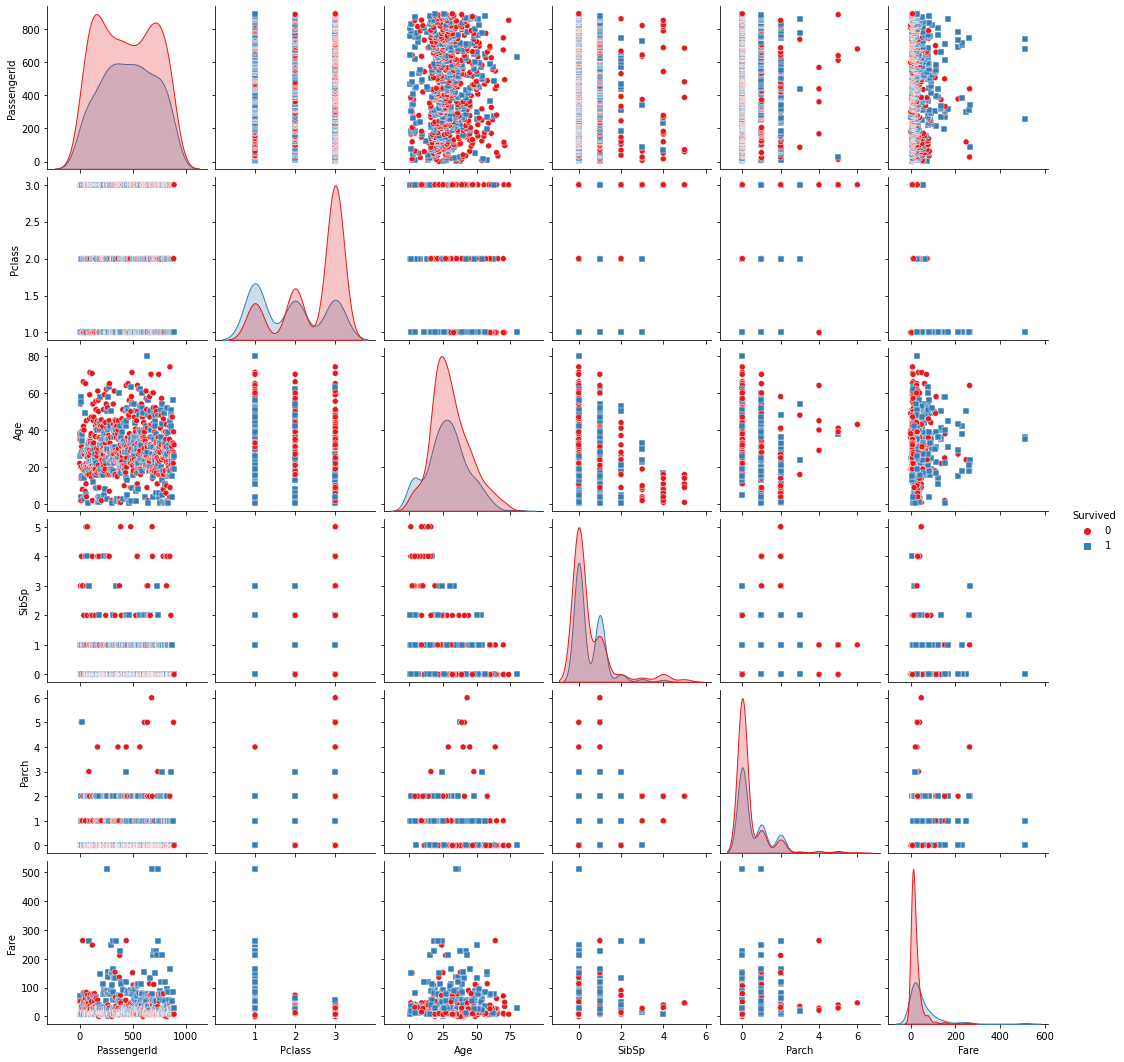

In [452]:
import seaborn as sns

sns.pairplot(train_data, hue = 'Survived', markers = ['o', 's'], palette = 'Set1')

Now that we have done an initial analysis the features, let's try to understand if there's any kind of correlation between them. Because there are categorical features and numerical features it gets a little harder to calculate the correlation and there are numerous ways of doing that, but here's what I'm going to do:


I'm gonna take every single feature, both categorical and numerical, and create multiple linear/logistic regression models with each possible pair of features. In this regression models, we will test if one of the features in the pair can be explained by the other one. If the resulting model for a certain pair is too good of a fit, they are probably highly correlated and there is no need for both of them to be in the model at the same time. Otherwise, they are not highly correlated.

In [433]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection

#to make things a little bit easier, gonna map male to 0 and female to 1 for the sex variable
train_data['Sex'].map({'male': 0, 'female': 1})

numerical_features = ['SibSp','Parch', 'PassengerId', 'Age', 'Fare']
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']

# to do
# create dummy variables for the categorical features
# make all possible combinations of numerical features and categorical features through a loop.
# if both numerical in a pair, use feature_selection_f_regression test 
# if both categorical, use feature_selection_chi2 test
# else we can think the problem as a numerical feature being explained by a categorical one
# so use feature_selection_f_regression test 
#if p-value too low, the pair of features explain themselves way too well and are correlated
#if too high, probably uncorrelated





# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_data.loc[:,['Age']], train_data['Fare'].values)


# The coefficients
print('Slope (theta1): \t', regr.coef_[0])
print('Intercept (theta0): \t', regr.intercept_)

print(regr.score(train_data.loc[:,['Age']], train_data['Fare'].values))

Slope (theta1): 	 0.3402236813497708
Intercept (theta0): 	 24.48230950433604
0.008675528639655372
